# Frequentist Inference Case Study - Part B
* Notebook completed by Adam Lang
* Date: 4/16/2024
* This case study was completed as part of the Springboard Data Science Fellowship program.

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed

In [2]:
# upload dataset
medical = pd.read_csv('insurance2.csv')

In [3]:
# check data shape
medical.shape

(1338, 8)

In [4]:
# view head of dataframe
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

In [5]:
## first lets look at the .describe() function for charges
medical['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

Summary: 
* We can see looking at the statistical output from the `.describe()` function a brief window into the `charges` data.
* The max value is over 63,000 which likely is an extreme outlier.
* The mean is 13,270 which appears to be closer to the 75% quartile.
* The min value is 1,121.
* The median (50%) is 9,382. 
* Based off the fact the mean is higher than the median, I predict the data will be right skewed with a longer tail towards higher charge values.

In [9]:
## estimate the bin width
bin_est = np.sqrt(len(medical['charges']))  # square root of number of observations
bin_est = round(bin_est, 0)  # round to nearest whole number
print(bin_est)

37.0


__A:__
* See histogram below.
* Mean: 13270.42
* Standard Deviation: 12105.48

In [22]:
## calculate the mean
mean_charge = round(np.mean(medical['charges']),2)
print(f"The mean charge is: {mean_charge}")


# calculate the standard deviation
std_charge = round(np.std(medical['charges']),2)
print(f"The standard deviation charges is: {std_charge}")

The mean charge is: 13270.42
The standard deviation charges is: 12105.48


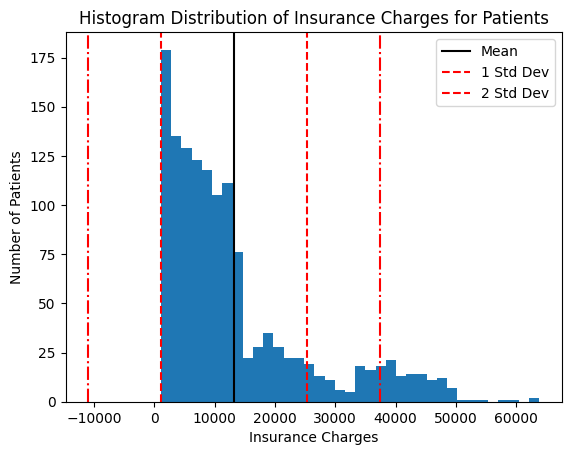

In [23]:
## histogram of charges
_ = plt.hist(medical['charges'], bins=37)
_ = plt.xlabel('Insurance Charges')
_ = plt.ylabel('Number of Patients')
_ = plt.axvline(mean_charge, color='k')
_ = plt.axvline(mean_charge + std_charge, color = 'r', linestyle='--')
_ = plt.axvline(mean_charge - std_charge, color = 'r', linestyle='--')
_ = plt.axvline(mean_charge + (std_charge*2), color='r', linestyle='-.')
_ = plt.axvline(mean_charge - (std_charge*2), color='r', linestyle='-.')
_ = plt.legend(['Mean', '1 Std Dev', '2 Std Dev'],loc='upper right')
_ = plt.title('Histogram Distribution of Insurance Charges for Patients');

**Summary of histogram:** As the summary statistics predicted, the data is right skewed

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__
* Random sampling would be appropriate to prove that the data actually represents a random sample of charges from our population. Random sampling allows us to give each observation in our data an equal chance of selection and thus generalize to the population.
* We can also assess the sample size adequacy, a larger sample size would give us more reliable results for our population. If the population is large enough then we can rely on the central limit theorem (CLT).
* The t-test and confidence intervals would also be prudent to assess. 
* So in summary, to justify this concern, I would first ensure the sample is random and adequately large enough and then compute a one-sample t-test. As we saw in the previous notebook a Z-score would not be appropriate as it could underestimate the population if the sample is too small.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ A two-sided interval I felt was most appropriate here. As we can see in the result below, the value of `$12,000` is not included in the two-sided interval or the one sided lower bounds of the interval for that matter. Therefore the administrator should be concerned about the average price dropping below this value because the lower bound of the 95% confidence interval is `$12,724.16`.

In [28]:

# Convert charges column to numpy array
charges = np.array([float(x) for x in medical['charges']])

# Sample statistics
sample_mean = np.mean(charges)
sample_std = np.std(charges, ddof=1)  # Use Bessel's correction for sample standard deviation
sample_size = len(charges)

# Degrees of freedom
dof = sample_size - 1

# Critical value for 95% confidence level (one-sided)
# Note: For one-sided interval, we use 1 - alpha
alpha = 0.05
t_critical = round(t.ppf(1 - alpha, dof),2)

# Calculate the one-sided confidence interval
confidence_interval_lower = round(sample_mean - (t_critical * (sample_std / np.sqrt(sample_size))),2)
confidence_interval_upper = round(sample_mean + (t_critical * (sample_std / np.sqrt(sample_size))),2)

print(f"Critical value (t_critical): {t_critical}")
print(f"95% one-sided confidence interval for the mean charge: {confidence_interval_lower}")
print(f"95% two-sided confidence interval for the mean charges: {confidence_interval_lower, confidence_interval_upper}")


Critical value (t_critical): 1.65
95% one-sided confidence interval for the mean charge: 12724.16
95% two-sided confidence interval for the mean charges: (12724.16, 13816.68)


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__
* **Null hypothesis:** No difference in mean charges between people with or without health insurance.
* **Alternative hypothesis:** There is a difference in the mean charges between people with insurance and those without insurance.
* The assumption we are making about the variance of the two groups is called the "homogeneity of variances" or "homodasticity assumption"; this means we are assuming that the variances of the 2 groups, patients with insurance and patients without insurance are equal.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 
* Manual calculation:
    * 1. Calculate means and standard deviations of the 2 groups.
    * 2. Calculate the pooled standard deviation.
    * 3. Calculate t-test statistic.
    * 4. Calculate degrees of freedom for t-test.
    * 5. Use t-test statistic and degrees of freedom to calculate p-value.


* To do this we are going to have to divide the dataframe up based on the "insuranceclaim" column. According to the Kaggle dataset we know:
    * yes = 1
    * no = 0
        * Therefore we know which patients have insurance and those that do not.


In [30]:
## We need to create to separate arrays to do this
# first group the dataframe by the "insuranceclaim" column
grouped = medical.groupby('insuranceclaim')

## use a list comprehension to create 2 numpy arrays 
charges_insured = np.array([group["charges"].values for name, group in grouped if name == 1][0])
charges_uninsured = np.array([group["charges"].values for name, group in grouped if name == 0][0])

In [32]:

# Sample statistics for insured group
n0 = len(charges_insured)
x_bar0 = np.mean(charges_insured)
s0 = np.std(charges_insured, ddof=1)  # Sample standard deviation for insured group

# Sample statistics for uninsured group
n1 = len(charges_uninsured)
x_bar1 = np.mean(charges_uninsured)
s1 = np.std(charges_uninsured, ddof=1)  # Sample standard deviation for uninsured group

# Calculate pooled standard deviation
sp = np.sqrt(((n0 - 1) * s0**2 + (n1 - 1) * s1**2) / (n0 + n1 - 2))

# Calculate t-test statistic
t_statistic_manual = (x_bar0 - x_bar1) / (sp * np.sqrt(1/n0 + 1/n1))

# Degrees of freedom
dof = n0 + n1 - 2

# Calculate p-value
p_value_manual = 2 * (1 - t.cdf(np.abs(t_statistic_manual), dof))

print("Manual Calculations:")
print("t-statistic:", t_statistic_manual)
print("p-value:", p_value_manual)


Manual Calculations:
t-statistic: 11.89329903087671
p-value: 0.0


#### Calculation using scipy.stats
* Need to import the scipy.stats.ttest_ind to calculate the T-test for the means of 2 independent samples of scores. 
* Note: This is a null hypothesis test that assumes there are 2 independent samples having an identical average (expected values) and that the populations have identical variances.

In [34]:
# import scipy ttest_ind
from scipy.stats import ttest_ind

In [35]:
# Perform t-test using scipy.stats
t_statistic_scipy, p_value_scipy = ttest_ind(charges_insured, charges_uninsured)

print("\nScipy Calculations:")
print("t-statistic:", t_statistic_scipy)
print("p-value:", p_value_scipy)



Scipy Calculations:
t-statistic: 11.893299030876712
p-value: 4.461230231620717e-31


Summary of results:
* The manual and scipy.stats methods both resulted in a t-statistic of 11.89.
* The p-value was 0.0 for the manual calculation and well below zero for the scipy calculation. This is essentially the same result, scipy is more exact.

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__Yes there actually is a `scipy.stats.zscore` function that will compute the `z-score` for each value in a sample relative to the sample mean and standard deviation. However, based on what we know about `z-scores`, this test would not be appropriate because the z-score assumes a normal distribution and we saw in our histogram above that the insurance charges do not follow a normal distribution and are right skewed. We also know that the z-score does not account for degrees of freedom of a dataset distribution and additionally, the z-score may give us a confidence interval that is too precise for our data. Thus, the `scipy.stats.ttest_ind` is more appropriate here.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test